#  US Election 2020 Tweets --- Sentiment Analysis

In [65]:
#conda install -c conda-forge wordcloud
#conda install -c conda-forge textblob

In [66]:
#imports
%matplotlib inline

import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import string
import re
from textblob import TextBlob #sentimate analysis
from textblob import Word
from nltk.probability import FreqDist

from scipy import stats
import seaborn as sns; sns.set()

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chitt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chitt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chitt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [67]:
import os
for dirname, _, filenames in os.walk(os.curdir):
    for filename in filenames:
        print(os.path.join(dirname, filename))


.\archive.zip
.\final-proj1 (4).ipynb
.\hashtag_donaldtrump.csv
.\hashtag_donaldtrump1.xlsx
.\hashtag_joebiden.csv
.\US Election 2020 Tweets --- Sentiment Analysis-Copy1.ipynb
.\US Election 2020 Tweets --- Sentiment Analysis-Copy2.ipynb
.\US Election 2020 Tweets --- Sentiment Analysis.ipynb
.\.ipynb_checkpoints\final-proj1 (4)-checkpoint.ipynb
.\.ipynb_checkpoints\US Election 2020 Tweets --- Sentiment Analysis-checkpoint.ipynb
.\.ipynb_checkpoints\US Election 2020 Tweets --- Sentiment Analysis-Copy1-checkpoint.ipynb
.\.ipynb_checkpoints\US Election 2020 Tweets --- Sentiment Analysis-Copy2-checkpoint.ipynb


In [68]:
trump_data = pd.read_csv("hashtag_donaldtrump.csv",lineterminator='\n')
#trump_data = pd.read_excel("hashtag_donaldtrump1.xlsx")
biden_data = pd.read_csv("hashtag_joebiden.csv",lineterminator='\n')

## Trump

In [69]:
trump_data.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [70]:
trump_data.describe()

,tweet_id,likes,retweet_count,user_id,user_followers_count,lat,long
count,9.709190e+05,970919.000000,970919.000000,9.709190e+05,9.709190e+05,445719.000000,445719.000000
mean,1.322494e+18,7.477011,1.698500,4.468311e+17,2.260357e+04,35.697936,-40.369638
std,2.555133e+15,158.058117,40.028419,5.544702e+17,3.042152e+05,18.823129,67.531751
min,1.316529e+18,0.000000,0.000000,5.310000e+02,0.000000e+00,-90.000000,-175.202642
25%,1.320478e+18,0.000000,0.000000,2.169326e+08,7.700000e+01,32.701939,-96.796856
50%,1.323612e+18,0.000000,0.000000,2.373392e+09,4.410000e+02,39.783730,-74.006015
75%,1.324505e+18,1.000000,0.000000,1.078344e+18,2.066000e+03,46.603354,6.776314
max,1.325589e+18,74084.000000,20491.000000,1.325581e+18,1.911533e+07,90.000000,179.048837


In [71]:
trump_data.isnull().sum()

created_at                   0
tweet_id                     0
tweet                        0
likes                        0
retweet_count                0
source                     876
user_id                      0
user_name                   16
user_screen_name             0
user_description        101266
user_join_date               0
user_followers_count         0
user_location           294953
lat                     525200
long                    525200
city                    743732
country                 528171
continent               528154
state                   650299
state_code              670494
collected_at                 0
dtype: int64

In [72]:
trump_data=trump_data.drop(columns = ['tweet_id', 'collected_at', 'user_description','user_screen_name','user_join_date'])

In [73]:
trump_data.head()

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_followers_count,user_location,lat,long,city,country,continent,state,state_code
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL
1,2020-10-15 00:00:01,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR
3,2020-10-15 00:00:02,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC


In [74]:
trump_data=trump_data.dropna()

In [75]:
trump_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199165 entries, 2 to 970912
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            199165 non-null  object 
 1   tweet                 199165 non-null  object 
 2   likes                 199165 non-null  float64
 3   retweet_count         199165 non-null  float64
 4   source                199165 non-null  object 
 5   user_id               199165 non-null  float64
 6   user_name             199165 non-null  object 
 7   user_followers_count  199165 non-null  float64
 8   user_location         199165 non-null  object 
 9   lat                   199165 non-null  float64
 10  long                  199165 non-null  float64
 11  city                  199165 non-null  object 
 12  country               199165 non-null  object 
 13  continent             199165 non-null  object 
 14  state                 199165 non-null  object 
 15  

In [76]:
trump_data.describe()

,likes,retweet_count,user_id,user_followers_count,lat,long
count,199165.000000,199165.000000,1.991650e+05,1.991650e+05,199165.000000,199165.000000
mean,11.449537,2.570748,2.962475e+17,3.219419e+04,36.548171,-43.349355
std,246.992555,62.097747,4.839031e+17,2.643791e+05,18.228199,65.770987
min,0.000000,0.000000,3.471000e+03,0.000000e+00,-43.530955,-158.077849
25%,0.000000,0.000000,8.775513e+07,1.600000e+02,33.749099,-87.624421
50%,0.000000,0.000000,5.794535e+08,7.880000e+02,40.712728,-74.006015
75%,2.000000,0.000000,7.752435e+17,3.075000e+03,48.856697,2.351462
max,74084.000000,20491.000000,1.325569e+18,1.321603e+07,64.837845,175.281788


In [77]:
trump_data.loc[:,'tweet_for'] = 'Trump'

In [78]:
trump_data.head()

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_for
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,Trump
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,Trump
11,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,1396.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,Trump
12,2020-10-15 00:00:26,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,496.0,"San Diego, CA",32.717421,-117.162771,San Diego,United States of America,North America,California,CA,Trump
13,2020-10-15 00:00:31,@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...,2.0,0.0,Twitter Web App,3.439562e+08,Sebastian White,2755.0,Edinburgh ~ Heart of Scotland!,55.953346,-3.188375,City of Edinburgh,United Kingdom,Europe,Scotland,SCT,Trump


In [79]:
#trump_user_followers = trump_data[['user_name','user_followers_count']].groupby('user_followers_count').count().sort_values(by=["user_followers_count"], ascending=False)["user_followers_count"].reset_index()

In [80]:
#trump_user_followers

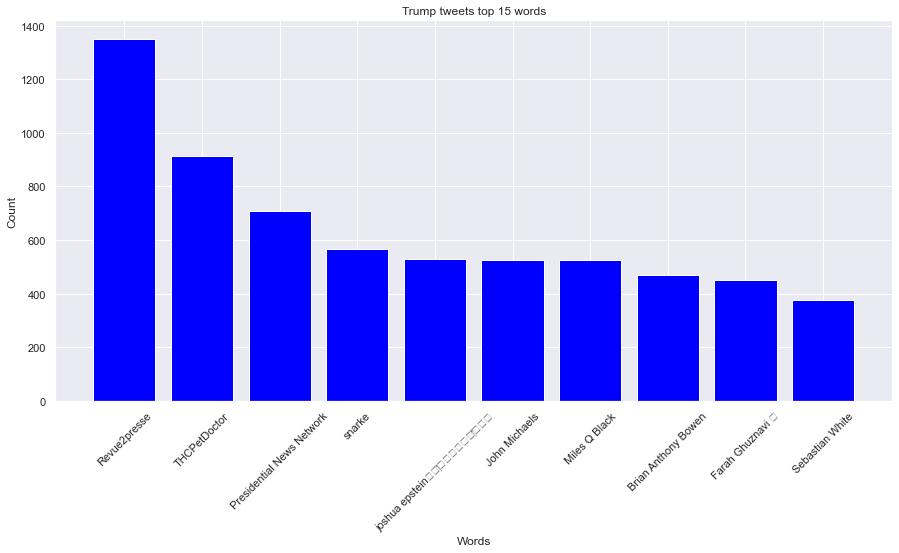

In [146]:
y = total_data.query('tweet_for == "Trump"').groupby(by='user_name').count().tweet.sort_values(ascending=False)[:10]
x = total_data.query('tweet_for == "Trump"').groupby(by='user_name').count().tweet.sort_values(ascending=False)[:10].index
plt.figure(figsize = (15, 7)) 
plt.bar(x, y,color='blue')
plt.xticks(rotation=45)
plt.xlabel("Words") 
plt.ylabel("Count") 
plt.title("Trump user active") 
plt.show() 

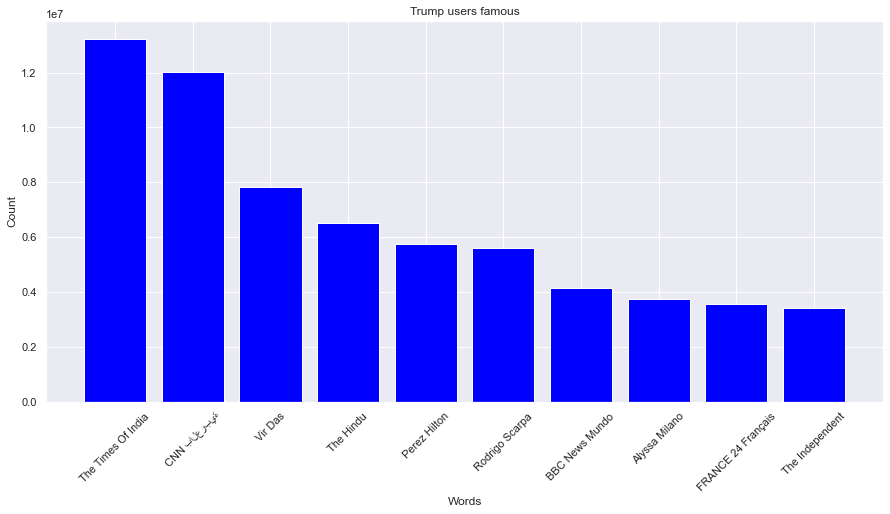

In [148]:
y = total_data.query('tweet_for == "Trump"').sort_values('user_followers_count',ascending=False).drop_duplicates(['user_name']).user_followers_count[:10]
x = total_data.query('tweet_for == "Trump"').sort_values('user_followers_count',ascending=False).drop_duplicates(['user_name']).user_name[:10]
plt.figure(figsize = (15, 7)) 
plt.bar(x, y,color='blue')
plt.xticks(rotation=45)
plt.xlabel("Words") 
plt.ylabel("Count") 
plt.title("Trump users famous") 
plt.show() 

## Biden

In [81]:
biden_data.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


In [82]:
biden_data.describe()

,tweet_id,likes,retweet_count,user_id,user_followers_count,lat,long
count,7.768860e+05,776886.000000,776886.000000,7.768860e+05,7.768860e+05,355293.000000,355293.000000
mean,1.322844e+18,10.161164,2.131331,4.532033e+17,2.884994e+04,35.104203,-41.979660
std,2.585560e+15,390.974423,96.661527,5.573483e+17,4.141085e+05,17.907910,67.823724
min,1.316529e+18,0.000000,0.000000,1.081000e+03,0.000000e+00,-79.406307,-172.120051
25%,1.320870e+18,0.000000,0.000000,2.257285e+08,7.400000e+01,31.816038,-97.268406
50%,1.323899e+18,0.000000,0.000000,2.464208e+09,4.280000e+02,39.783730,-74.006015
75%,1.325115e+18,2.000000,0.000000,1.088044e+18,2.081000e+03,43.653482,5.966069
max,1.325589e+18,165702.000000,63473.000000,1.325575e+18,8.241710e+07,90.000000,179.048837


In [83]:
biden_data.isnull().sum()

created_at                   0
tweet_id                     0
tweet                        0
likes                        0
retweet_count                0
source                     713
user_id                      0
user_name                   18
user_screen_name             0
user_description         82006
user_join_date               0
user_followers_count         0
user_location           233791
lat                     421593
long                    421593
city                    590014
country                 423107
continent               423089
state                   516691
state_code              532277
collected_at                 0
dtype: int64

In [84]:
biden_data=biden_data.drop(columns = ['tweet_id', 'collected_at', 'user_description','user_name','user_screen_name','user_join_date'])

In [85]:
biden_data.head()

,created_at,tweet,likes,retweet_count,source,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL
1,2020-10-15 00:00:18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT
3,2020-10-15 00:00:21,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA


In [86]:
biden_data=biden_data.dropna()

In [87]:
biden_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164673 entries, 6 to 776881
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            164673 non-null  object 
 1   tweet                 164673 non-null  object 
 2   likes                 164673 non-null  float64
 3   retweet_count         164673 non-null  float64
 4   source                164673 non-null  object 
 5   user_id               164673 non-null  float64
 6   user_followers_count  164673 non-null  float64
 7   user_location         164673 non-null  object 
 8   lat                   164673 non-null  float64
 9   long                  164673 non-null  float64
 10  city                  164673 non-null  object 
 11  country               164673 non-null  object 
 12  continent             164673 non-null  object 
 13  state                 164673 non-null  object 
 14  state_code            164673 non-null  object 
dtype

In [88]:
biden_data.describe()

,likes,retweet_count,user_id,user_followers_count,lat,long
count,164673.000000,164673.000000,1.646730e+05,1.646730e+05,164673.000000,164673.000000
mean,16.784579,3.361729,3.205418e+17,3.967030e+04,35.963481,-45.077640
std,555.000547,84.268318,5.005052e+17,3.385202e+05,17.245318,65.680267
min,0.000000,0.000000,1.081000e+03,0.000000e+00,-43.530955,-158.077849
25%,0.000000,0.000000,9.641200e+07,1.460000e+02,32.776272,-87.624421
50%,1.000000,0.000000,7.704772e+08,7.280000e+02,39.962260,-74.006015
75%,2.000000,0.000000,8.225108e+17,3.189000e+03,45.497216,2.351462
max,165702.000000,20615.000000,1.325550e+18,1.321635e+07,64.837845,176.167505


In [89]:
biden_data.loc[:,'tweet_for']='Biden'

In [90]:
biden_data.head()

,created_at,tweet,likes,retweet_count,source,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_for
6,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,1397.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,Biden
17,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how...",0.0,0.0,Twitter Web App,1.016593e+08,83.0,"Tampa, Florida",27.947760,-82.458444,Tampa,United States of America,North America,Florida,FL,Biden
22,2020-10-15 00:01:47,Twitter is doing everything they can to help D...,1.0,0.0,Twitter for iPhone,1.139962e+18,2.0,"Hollywood, FL",34.098003,-118.329523,Los Angeles,United States of America,North America,California,CA,Biden
25,2020-10-15 00:01:57,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,0.0,0.0,Twitter for Android,1.300837e+18,29.0,"Los Angeles, CA",34.053691,-118.242766,Los Angeles,United States of America,North America,California,CA,Biden
28,2020-10-15 00:02:05,#Trump #Obama #Clinton #Biden\n\n#ManWomanPers...,0.0,0.0,Twitter for iPhone,1.321631e+08,841.0,"London, UK",51.507322,-0.127647,London,United Kingdom,Europe,England,ENG,Biden


## Combined Trump + Biden

In [91]:
total_data=pd.concat([trump_data,biden_data])
total_data.sort_values(by='created_at')

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_for
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,Trump
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,Trump
6,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,NaN,1397.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,Biden
11,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,1396.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,Trump
12,2020-10-15 00:00:26,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,496.0,"San Diego, CA",32.717421,-117.162771,San Diego,United States of America,North America,California,CA,Trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970896,2020-11-08 23:58:54,@TeamTrump @alex281832 #Trump is being made to...,1.0,0.0,Twitter for Android,5.008862e+08,Ken Noble😎,453.0,"West London, UK",51.532568,-0.480700,London,United Kingdom,Europe,England,ENG,Trump
776876,2020-11-08 23:59:16,"Mr. #Biden, tear down that wall (with #Mexico)...",1.0,0.0,Twitter for iPhone,3.772296e+08,NaN,444.0,"Auckland, NZ",-36.852095,174.763180,Auckland,New Zealand,Oceania,Auckland,AUK,Biden
970907,2020-11-08 23:59:25,"Donald Trump, Moscow, 1996, shared by @oooroma...",8.0,3.0,Twitter Web App,3.881374e+08,Elisabeth Schimpfössl,586.0,"London, England",51.507322,-0.127647,London,United Kingdom,Europe,England,ENG,Trump
970912,2020-11-08 23:59:38,Stop laying @CNN !\n#Paris and #London dont gi...,0.0,0.0,Twitter for iPhone,3.873620e+08,flaquet,27.0,PARIS,48.856697,2.351462,Paris,France,Europe,Ile-de-France,IDF,Trump


In [92]:
trump_tweets=total_data.query('(tweet_for=="Trump")').tweet.sort_values(ascending=False).count()
biden_tweets=total_data.query('(tweet_for=="Biden")').tweet.sort_values(ascending=False).count()

trump_likes=total_data.query('(tweet_for=="Trump")').likes.count()
biden_likes=total_data.query('(tweet_for=="Biden")').likes.count()

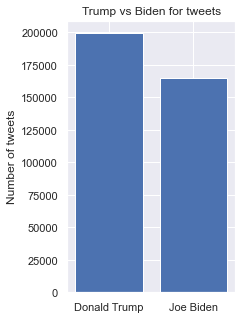

In [93]:
x_pos=('Donald Trump','Joe Biden')
y_pos=np.arange(len(x_pos))
performance = [trump_tweets,biden_tweets]
plt.figure(figsize=(3,5))
plt.bar(y_pos,performance,align='center')
plt.xticks(y_pos,x_pos)
plt.ylabel('Number of tweets')
plt.title('Trump vs Biden for tweets')

plt.show()

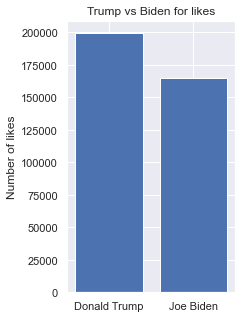

In [94]:
x_pos=('Donald Trump','Joe Biden')
y_pos=np.arange(len(x_pos))
performance = [trump_likes,biden_likes]
plt.figure(figsize=(3,5))
plt.bar(y_pos,performance,align='center')
plt.xticks(y_pos,x_pos)
plt.ylabel('Number of likes')
plt.title('Trump vs Biden for likes')

plt.show()

In [95]:
print("Count of duplicates: {}".format(total_data.duplicated(subset=["tweet"]).sum()))

Count of duplicates: 50326


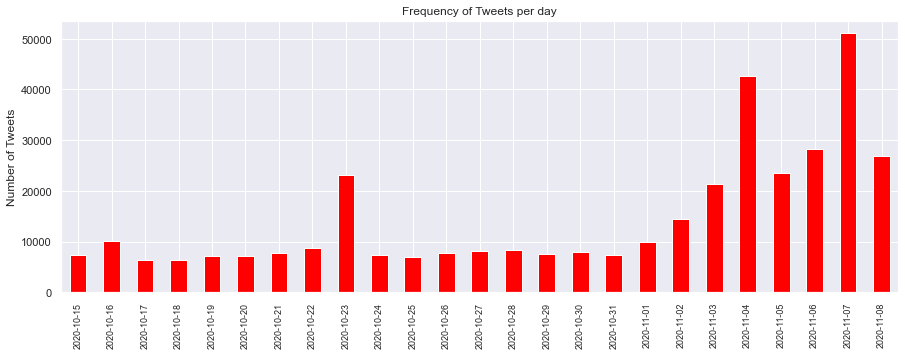

In [96]:
total_data['created_at']=pd.to_datetime(total_data['created_at'])
plt.figure(figsize=(15,5))
ax=total_data.created_at.dt.date.value_counts().sort_index().plot.bar(rot=90,color='red')
plt.setp(ax.get_xticklabels(),fontsize=9)
plt.ylabel('Number of Tweets')
plt.title('Frequency of Tweets per day')
plt.show()

In [97]:
tweet_max=total_data.loc[total_data['retweet_count'].idxmax()]
print(f"Tweet is - \n\n'{tweet_max.tweet}'\n\nretweet_count({tweet_max.retweet_count} times)")

Tweet is - 

'America Assembled!🇺🇸🎉

@JoeBiden @KamalaHarris @BarackObama 
@ChrisEvans  @MarkRuffalo @RobertDowneyJr @brielarson @AOC @staceyabrams @michaelb4jordan @Russo_Brothers 
#Election2020 #ElectionResults2020 #joebiden #DonaldTrump #BidenHarris2020 #avengers #endgame https://t.co/cDl1VsFbOo'

retweet_count(20615.0 times)


In [98]:
print(f'Unique retweets {total_data.retweet_count.nunique()}')

Unique retweets 632


In [99]:
trump_country_y=total_data.query('(tweet_for=="Trump")').groupby(by='country').count().tweet.sort_values(ascending=False)
trump_country_x=total_data.query('(tweet_for=="Trump")').groupby(by='country').count().tweet.sort_values(ascending=False).index

biden_country_y=total_data.query('(tweet_for=="Biden")').groupby(by='country').count().tweet.sort_values(ascending=False)
biden_country_x=total_data.query('(tweet_for=="Biden")').groupby(by='country').count().tweet.sort_values(ascending=False).index

In [100]:
print(f'Unique countries {total_data.country.nunique()}')

Unique countries 51


In [101]:
total_data.head()

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_for
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,Trump
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,Trump
11,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,1396.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,Trump
12,2020-10-15 00:00:26,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,496.0,"San Diego, CA",32.717421,-117.162771,San Diego,United States of America,North America,California,CA,Trump
13,2020-10-15 00:00:31,@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...,2.0,0.0,Twitter Web App,3.439562e+08,Sebastian White,2755.0,Edinburgh ~ Heart of Scotland!,55.953346,-3.188375,City of Edinburgh,United Kingdom,Europe,Scotland,SCT,Trump


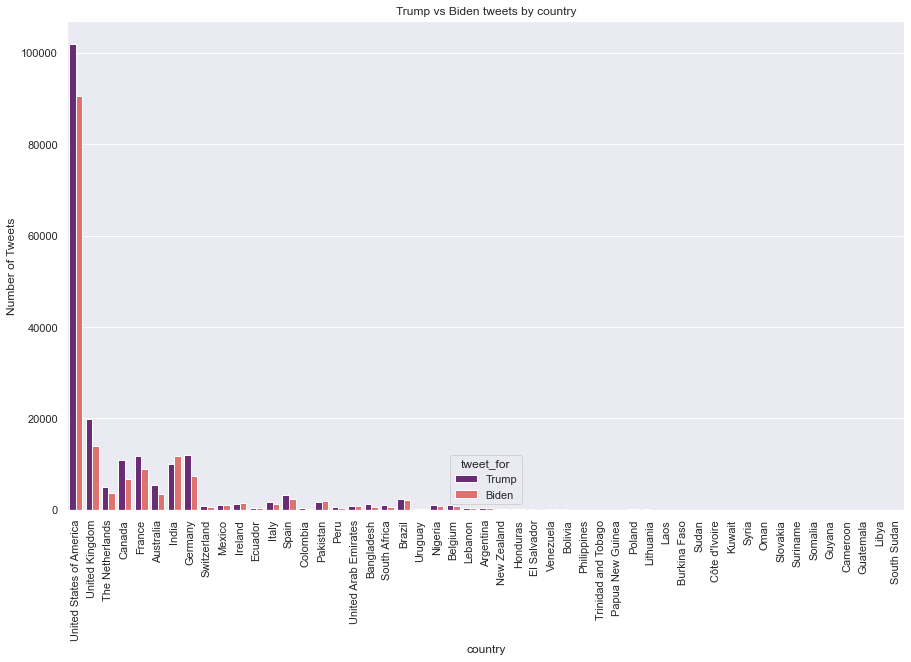

In [102]:
plt.figure(figsize=(15,9))
bar_plot=sns.countplot(x = 'country', hue = 'tweet_for', data = total_data, palette = 'magma')
#gr.set_xticklabels(gr.get_xticklabels(), rotation=90)
plt.xticks(rotation=90)
plt.ylabel('Number of Tweets')
plt.title('Trump vs Biden tweets by country')
plt.show()

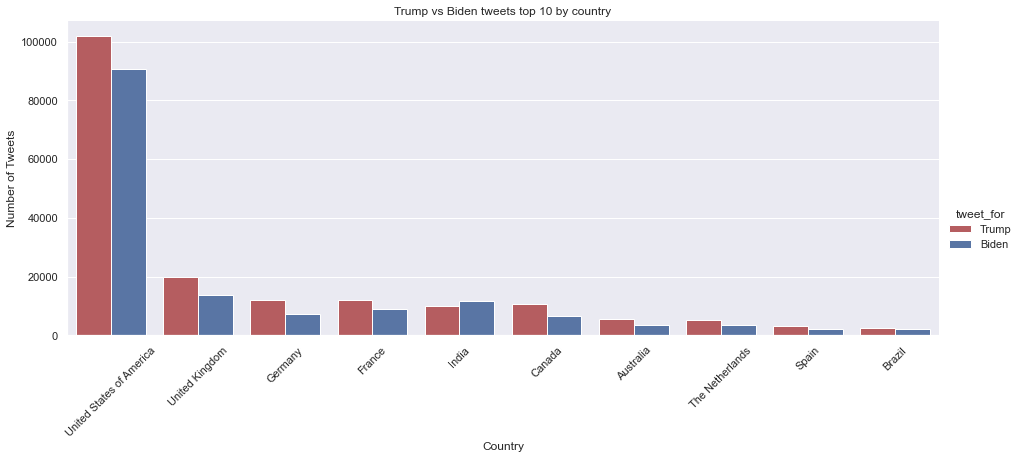

In [103]:
total_data["country"] = total_data["country"].replace({"United States":"United States of America"})
data = total_data[(total_data.country.isin(total_data.country.value_counts()[:10].index))].groupby(["country", "tweet_for"]).count().sort_values(by=["user_id"], ascending=False)["user_id"].reset_index()
ax=sns.catplot(x="country", y="user_id", hue="tweet_for", kind="bar", aspect=21/8,palette=['r', 'b'], data=data).set( xlabel='Country', ylabel='Number of Tweets',title='Trump vs Biden tweets top 10 by country')
ax.set_xticklabels(rotation=45)


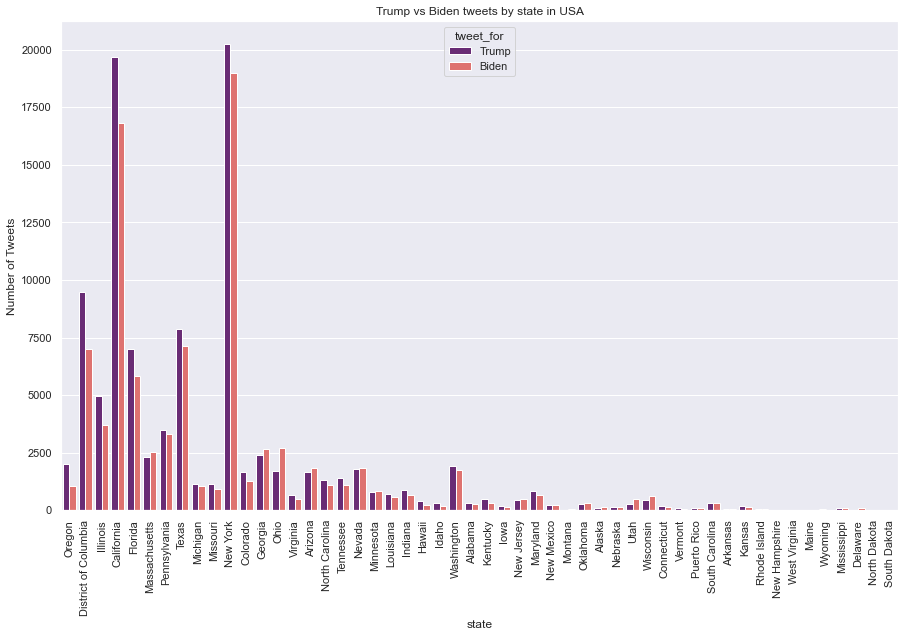

In [104]:
plt.figure(figsize=(15,9))
data=total_data.loc[total_data['country'] == "United States of America"]
#data=data.groupby(by='state').count().tweet.sort_values(ascending=False)
bar_plot=sns.countplot(x = 'state', hue = 'tweet_for', data = data, palette = 'magma')
#gr.set_xticklabels(gr.get_xticklabels(), rotation=90)
plt.xticks(rotation=90)
plt.ylabel('Number of Tweets')
plt.title('Trump vs Biden tweets by state in USA')
plt.show()

In [111]:
total_data['user_name'].value_counts(ascending=False)[:10]

Revue2presse                   1352
THCPetDoctor                    913
Presidential News Network       709
snarke                          566
joshua epstein🏳️‍🌈🖖🏼🗽👨🏼‍💻🇺🇸     531
John Michaels                   525
Miles Q Black                   525
Brian Anthony Bowen             469
Farah Ghuznavi 📚                452
Sebastian White                 378
Name: user_name, dtype: int64

E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128406 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127996 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128509 missing from current font.
  font

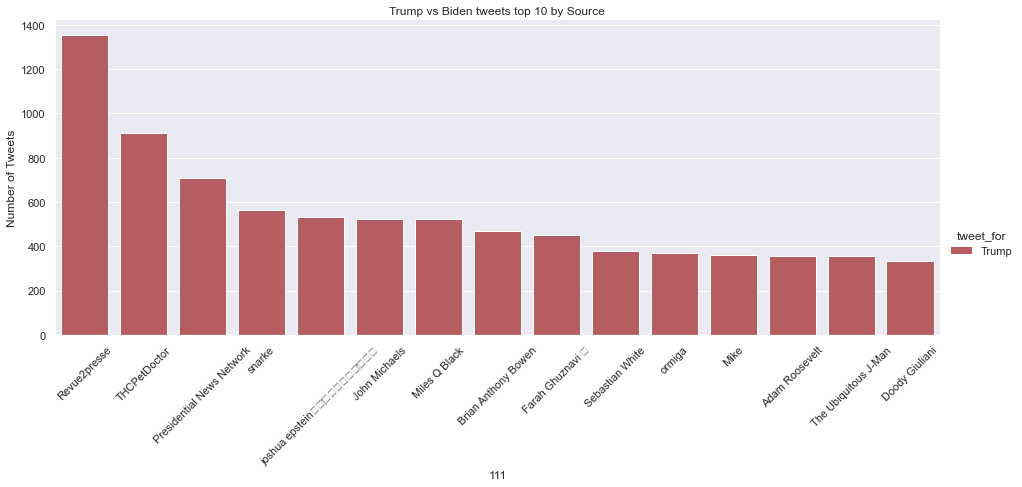

In [120]:
data = total_data[(total_data.user_name.isin(total_data.user_name.value_counts()[:15].index))].groupby(["user_name", "tweet_for"]).count().sort_values(by=["user_id"], ascending=False)["user_id"].reset_index()
ax=sns.catplot(x="user_name", y="user_id", hue="tweet_for", kind="bar", aspect=21/8,palette=['r', 'b'], data=data).set( xlabel='111', ylabel='Number of Tweets',title='Trump vs Biden tweets top 10 by Source')
ax.set_xticklabels(rotation=45)


In [125]:
import re

def find_at(text):
    text= re.findall(r"@(\w+)",text)
    return text

def find_hashtag(text):
    text= re.findall(r"#(\w+)",text)
    return text

total_data["at_s"] = total_data.tweet.apply(find_at)
total_data["hash_tags"] = total_data.tweet.apply(find_hashtag)

In [131]:
total_data.head()

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_for,at_s,hash_tags
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,Trump,[],[Trump]
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,Trump,[],"[Trump, Iowa]"
11,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,1396.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,Trump,"[jack, vijaya, dickc, KatieS, marciadorsey, jack]","[NYPost, censorship, CENSORED, JoeBiden, Trump..."
12,2020-10-15 00:00:26,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,496.0,"San Diego, CA",32.717421,-117.162771,San Diego,United States of America,North America,California,CA,Trump,[],"[Trump, PresidentTrump, Trump2020LandslideVict..."
13,2020-10-15 00:00:31,@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...,2.0,0.0,Twitter Web App,3.439562e+08,Sebastian White,2755.0,Edinburgh ~ Heart of Scotland!,55.953346,-3.188375,City of Edinburgh,United Kingdom,Europe,Scotland,SCT,Trump,"[Susan_Hutch, JoeBiden, RealDonaldTrump, GOP]","[Ukraine, FactCheck, Trump]"


In [132]:
trump_data_clean = total_data.query('(tweet_for == "Trump")').sort_values('created_at',ascending = False)

In [135]:
trump_data_clean.head()

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_for,at_s,hash_tags
970912,2020-11-08 23:59:38,Stop laying @CNN !\n#Paris and #London dont gi...,0.0,0.0,Twitter for iPhone,387361991.0,flaquet,27.0,PARIS,48.856697,2.351462,Paris,France,Europe,Ile-de-France,IDF,Trump,[CNN],"[Paris, London, biden, trump]"
970907,2020-11-08 23:59:25,"Donald Trump, Moscow, 1996, shared by @oooroma...",8.0,3.0,Twitter Web App,388137441.0,Elisabeth Schimpfössl,586.0,"London, England",51.507322,-0.127647,London,United Kingdom,Europe,England,ENG,Trump,[oooromanova],[Trump]
970896,2020-11-08 23:58:54,@TeamTrump @alex281832 #Trump is being made to...,1.0,0.0,Twitter for Android,500886203.0,Ken Noble😎,453.0,"West London, UK",51.532568,-0.480700,London,United Kingdom,Europe,England,ENG,Trump,"[TeamTrump, alex281832, USATODAY, washingtonpo...",[Trump]
970895,2020-11-08 23:58:51,Have you know decency #Trump @GOP? Do you kno...,3.0,0.0,Twitter Web App,48352311.0,"Linda ""I Voted for Biden"" Kenney Baden",3024.0,"New York, USA",40.712728,-74.006015,New York,United States of America,North America,New York,NY,Trump,[GOP],"[Trump, BillHeath, PresidentElectJoeBiden, Joe..."
970890,2020-11-08 23:58:44,Cómo pasó el abogado de Trump de un hotel a un...,0.0,1.0,Twitter Web App,84963978.0,Impacto Latino,1517.0,New York City,40.712728,-74.006015,New York,United States of America,North America,New York,NY,Trump,[],"[ImpactoLatino, Elecciones2020, Trump, Estados..."


E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128406 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127996 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\000_NEU\Sft\Acon3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128509 missing from current font.
  font

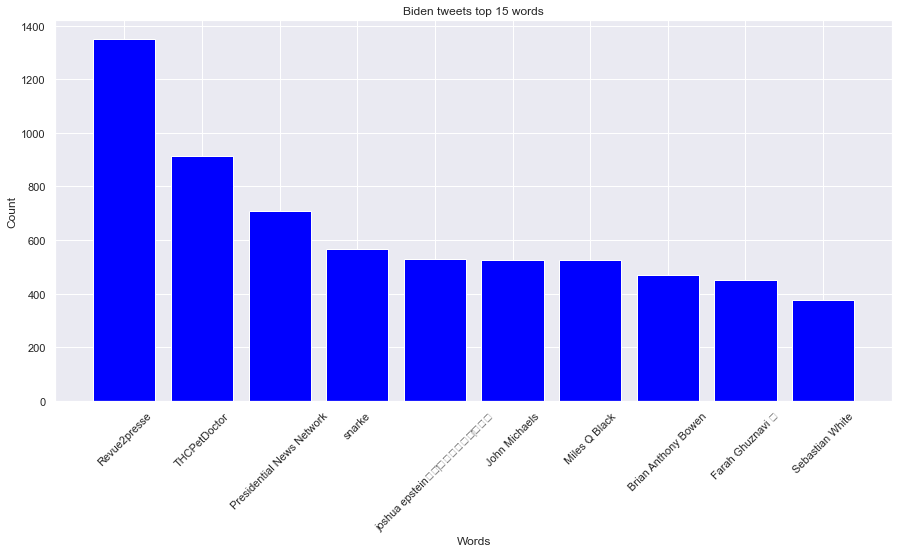

Index([], dtype='object', name='user_name')

In [107]:
plt.figure(figsize=(15,9))
#data=total_data.loc[total_data['country'] == "United States of America"]
data_x=total_data.groupby(by='user_location').count().tweet.sort_values(ascending=False).index
data_y=total_data.groupby(by='user_location').count().tweet.sort_values(ascending=False)
data_y[:10]


user_location
Washington, DC     10830
Los Angeles, CA     9828
New York, NY        7458
London, England     7039
Paris, France       6683
Paris               6574
London              6219
New York, USA       5973
Chicago, IL         4491
New York            4301
Name: tweet, dtype: int64

<Figure size 1080x648 with 0 Axes>

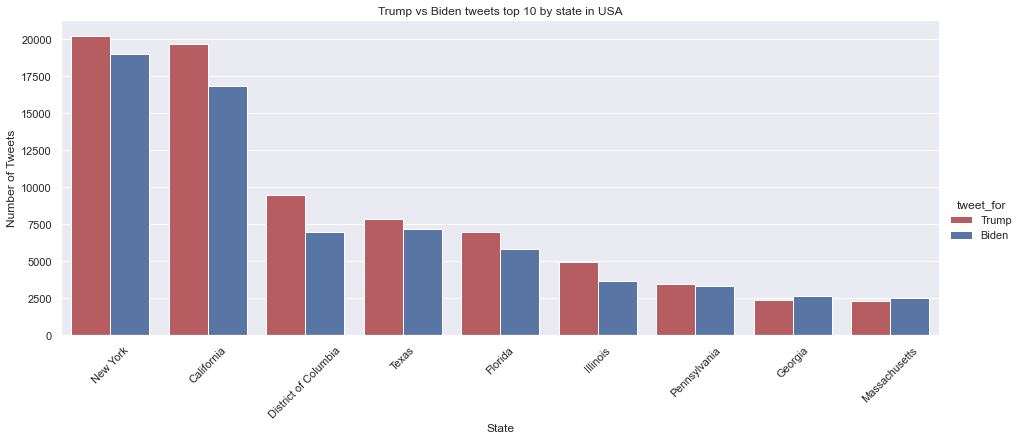

In [108]:
data = total_data[(total_data.country == "United States of America") & (total_data.state.isin(total_data.state.value_counts()[:15].index))].groupby(["state", "tweet_for"]).count().sort_values(by=["user_id"], ascending=False)["user_id"].reset_index()
ax=sns.catplot(x="state", y="user_id", hue="tweet_for", kind="bar", aspect=21/8,palette=['r', 'b'], data=data).set( xlabel='State', ylabel='Number of Tweets',title='Trump vs Biden tweets top 10 by state in USA')
ax.set_xticklabels(rotation=45)

,created_at,tweet,likes,retweet_count,source,user_name,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,tweet_for,clean_tweet
29,2020-10-15 00:01:30,@karatblood @KazePlays_JC Grab @realDonaldTrum...,2.0,0.0,Twitter for iPhone,Baylee,1952.0,"Western Washington, USA",41.882823,-87.686307,Chicago,United States of America,North America,Illinois,IL,Trump,_jc grab by the balls amp chuck the bastar...
75,2020-10-15 00:03:38,@JoeBiden #donaldtrump 4 more years!,0.0,0.0,Twitter Web App,Scott Seifferlein,430.0,Grand Rapids,42.963241,-85.667864,Grand Rapids,United States of America,North America,Michigan,MI,Trump,donaldtrump more years
109,2020-10-15 00:05:50,@JoeBiden #BidenHarris2020 #DonaldTrump #Hunte...,1.0,0.0,Twitter for Android,Joe Levija,58.0,"Fitchburg, WI",42.590366,-71.811984,Fitchburg,United States of America,North America,Massachusetts,MA,Trump,donaldtrump hunterbiden t tbdfpoedzx
173,2020-10-15 00:08:52,The President @realDonaldTrump got impeached f...,0.0,0.0,Twitter for iPhone,Pedro Gutierrez,2366.0,"Chicago, IL",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,Trump,the president got impeached for something joe...
176,2020-10-15 00:09:02,#BidenHarris #BidenHarris #BidenHarris #BidenH...,0.0,0.0,Twitter for iPhone,Americana,58.0,"Phoenix, AZ",33.448437,-112.074142,Phoenix,United States of America,North America,Arizona,AZ,Trump,bidenharris bidenharris bidenharris bidenharri...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970895,2020-11-08 23:58:51,Have you know decency #Trump @GOP? Do you kno...,3.0,0.0,Twitter Web App,"Linda ""I Voted for Biden"" Kenney Baden",3024.0,"New York, USA",40.712728,-74.006015,New York,United States of America,North America,New York,NY,Trump,have you know decency trump do you know wha...
970896,2020-11-08 23:58:54,@TeamTrump @alex281832 #Trump is being made to...,1.0,0.0,Twitter for Android,Ken Noble😎,453.0,"West London, UK",51.532568,-0.480700,London,United Kingdom,Europe,England,ENG,Trump,trump is being made to embrace defeat via me...
970907,2020-11-08 23:59:25,"Donald Trump, Moscow, 1996, shared by @oooroma...",8.0,3.0,Twitter Web App,Elisabeth Schimpfössl,586.0,"London, England",51.507322,-0.127647,London,United Kingdom,Europe,England,ENG,Trump,donald trump mosw shared by trump t uw...
970912,2020-11-08 23:59:38,Stop laying @CNN !\n#Paris and #London dont gi...,0.0,0.0,Twitter for iPhone,flaquet,27.0,PARIS,48.856697,2.351462,Paris,France,Europe,Ile-de-France,IDF,Trump,stop laying paris and london dont give a fuc...


# Sentimental Analysis

## Trump

In [ ]:
trump_blob = [TextBlob(desc) for desc in trump_data['tweet']]
trump_data['polarity'] = [b.sentiment.polarity for b in trump_blob]
trump_data['subjectivity'] = [b.sentiment.subjectivity for b in trump_blob]
trump_data

In [ ]:
trump_data.loc[trump_data.polarity > 0,'sentiment'] = 'positive'
trump_data.loc[trump_data.polarity == 0,'sentiment'] = 'neutral'
trump_data.loc[trump_data.polarity < 0,'sentiment'] = 'negative'
trump_data

In [ ]:
t_pos = len(trump_data.loc[trump_data.sentiment=='positive'])
t_neu = len(trump_data.loc[trump_data.sentiment=='neutral'])
t_neg = len(trump_data.loc[trump_data.sentiment=='negative'])

t_data = {'Positive':t_pos,'Neutral':t_neu,'Negative':t_neg}
t_senti = list(t_data.keys()) 
t_ntweets = list(t_data.values()) 

plt.figure(figsize = (15, 7)) 
plt.bar(t_senti, t_ntweets) 
plt.xlabel("Sentiment") 
plt.ylabel("Number of tweets") 
plt.title("Trump tweets by Sentiment") 
plt.show() 

## Biden

In [ ]:
biden_blob = [TextBlob(desc) for desc in biden_data['tweet']]
biden_data['polarity'] = [b.sentiment.polarity for b in biden_blob]
biden_data['subjectivity'] = [b.sentiment.subjectivity for b in biden_blob]
biden_data

In [ ]:
biden_data.loc[biden_data.polarity > 0,'sentiment'] = 'positive'
biden_data.loc[biden_data.polarity == 0,'sentiment'] = 'neutral'
biden_data.loc[biden_data.polarity < 0,'sentiment'] = 'negative'
biden_data

In [ ]:
b_pos = len(biden_data.loc[biden_data.sentiment=='positive'])
b_neu = len(biden_data.loc[biden_data.sentiment=='neutral'])
b_neg = len(biden_data.loc[biden_data.sentiment=='negative'])

b_data = {'Positive':b_pos,'Neutral':b_neu,'Negative':b_neg}
b_senti = list(b_data.keys()) 
b_ntweets = list(b_data.values()) 

plt.figure(figsize = (15, 7)) 
plt.bar(b_senti, b_ntweets) 
plt.xlabel("Sentiment") 
plt.ylabel("Number of tweets") 
plt.title("Biden tweets by Sentiment") 
plt.show() 

## Both

In [ ]:
total_data_new=pd.concat([trump_data,biden_data])
total_data_new.sort_values(by='created_at')

In [ ]:
plt.figure(figsize=(15,9))
bar_plot=sns.countplot(x = 'sentiment', hue = 'tweet_for', data = total_data_new, palette = 'magma')
#plt.ylim(0, 20)
#plt.xlim(0, 3)
plt.xticks(rotation=0)
plt.ylabel('Number of Tweets')
plt.title('Trump vs Biden tweets by source')
plt.show()